##Методические указания

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML2.2%20real%20classification/data/diabetes.csv")


In [4]:
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
y = data.Outcome
X = data.drop(["Outcome"], axis=1)


In [8]:
y.shape, X.shape


((768,), (768, 8))

In [9]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [10]:
print("Coefficients: \n", logistic.coef_[0])

Coefficients: 
 [ 1.17252342e-01  3.35998330e-02 -1.40873785e-02 -1.27048112e-03
 -1.24032092e-03  7.72023486e-02  1.41904173e+00  1.00353713e-02]


In [11]:
_ = [print(k, v) for k, v in zip(X.columns, logistic.coef_[0])]

Pregnancies 0.11725234162003154
Glucose 0.033599833017272665
BloodPressure -0.014087378542667953
SkinThickness -0.0012704811238511405
Insulin -0.0012403209242111725
BMI 0.07720234864219887
DiabetesPedigreeFunction 1.419041726277172
Age 0.010035371255526136


In [12]:
print("Intercept: \n", logistic.intercept_)

Intercept: 
 [-7.70291291]


In [13]:
y_pred = logistic.predict(X)

In [14]:
_ = [print(a, b) for a, b in list(zip(y, y_pred))[:10]]

1 1
0 0
1 1
0 0
1 1
0 0
1 0
0 1
1 1
1 0


In [15]:
from sklearn import metrics
metrics.confusion_matrix(y, y_pred)

array([[447,  53],
       [114, 154]])

<Axes: >

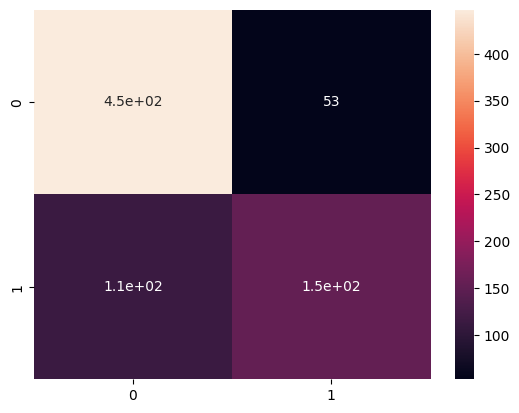

In [16]:
import seaborn as sns
sns.heatmap(metrics.confusion_matrix(y, y_pred), annot=True)

In [17]:
logistic.score(X, y)

0.7825520833333334

In [ ]:
metrics.accuracy_score(y_test, y_pred)

In [19]:
from sklearn.preprocessing import PolynomialFeatures

In [20]:
poly = PolynomialFeatures(2)

In [21]:
poly = poly.fit_transform(X)
poly

array([[1.00000e+00, 6.00000e+00, 1.48000e+02, ..., 3.93129e-01,
        3.13500e+01, 2.50000e+03],
       [1.00000e+00, 1.00000e+00, 8.50000e+01, ..., 1.23201e-01,
        1.08810e+01, 9.61000e+02],
       [1.00000e+00, 8.00000e+00, 1.83000e+02, ..., 4.51584e-01,
        2.15040e+01, 1.02400e+03],
       ...,
       [1.00000e+00, 5.00000e+00, 1.21000e+02, ..., 6.00250e-02,
        7.35000e+00, 9.00000e+02],
       [1.00000e+00, 1.00000e+00, 1.26000e+02, ..., 1.21801e-01,
        1.64030e+01, 2.20900e+03],
       [1.00000e+00, 1.00000e+00, 9.30000e+01, ..., 9.92250e-02,
        7.24500e+00, 5.29000e+02]])

In [22]:
polynomial = LogisticRegression()
polynomial.fit(poly, y)
y_pred_poly = polynomial.predict(poly)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##Задания для самостоятельного выполнения

#### 1. Изучите документацию sklearn, посвященную классу LogisticRegression. Какую еще информацию можно вывести для обученной модели? Попробуйте изменить аргументы при создании модели и посмотрите, как это влияет на качество предсказания.

In [23]:
# Расчет точности
accuracy = logistic.score(X, y)
print("Accuracy: ", accuracy)

# Вывод вероятностей для каждого класса
probabilities = logistic.predict_proba(X)
print("Predicted Probabilities:\n", probabilities)

# Значения решающей функции
decision_values = logistic.decision_function(X)
print("Decision Function Values:\n", decision_values)

# Получение параметров модели
params = logistic.get_params()
print("Model Parameters:\n", params)

Accuracy:  0.7825520833333334
Predicted Probabilities:
 [[0.28902482 0.71097518]
 [0.94446069 0.05553931]
 [0.17424645 0.82575355]
 ...
 [0.82665044 0.17334956]
 [0.71230916 0.28769084]
 [0.92140665 0.07859335]]
Decision Function Values:
 [ 9.00124972e-01 -2.83352307e+00  1.55582568e+00 -3.05374488e+00
  2.98928426e+00 -1.69886793e+00 -2.57842667e+00  5.40011568e-01
  5.44731370e-01 -3.04617566e+00 -1.35905432e+00  2.10883372e+00
  1.72203595e+00  3.21588797e-01  5.42036543e-01 -1.98144682e-01
 -6.37602769e-01 -1.37270777e+00 -7.65010460e-01 -1.12197530e+00
 -3.96818679e-01 -8.36530611e-01  2.55964820e+00 -9.17616978e-01
  5.42259147e-01 -3.88849462e-01  8.24375390e-01 -2.74599992e+00
  1.11773596e-02 -9.89348306e-01 -3.87651694e-01  4.65550137e-01
 -2.77811060e+00 -3.12015607e+00 -2.60484414e-01 -1.34361302e+00
  6.63352529e-01 -3.92860342e-01 -1.52186247e+00  5.63583547e-01
  9.46997153e-01  8.65787669e-01 -2.07180576e+00  2.29017516e+00
  4.92592175e-01  3.54537020e+00 -8.47030914e-

In [26]:
# Выделение целевой переменной и факторов
y = data.Outcome
X = data.drop(["Outcome"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели с базовыми параметрами
logistic_base = LogisticRegression()
logistic_base.fit(X_train, y_train)

# Оценка базовой модели
print("Base Model Accuracy:", logistic_base.score(X_test, y_test))

# Создание и обучение модели с измененными параметрами
logistic_tuned = LogisticRegression(penalty='l1', C=1000, solver='liblinear', max_iter=1000, class_weight='balanced', random_state=42)
logistic_tuned.fit(X_train, y_train)

# Оценка модели с измененными параметрами
print("Tuned Model Accuracy:", logistic_tuned.score(X_test, y_test))




Base Model Accuracy: 0.7467532467532467
Tuned Model Accuracy: 0.6948051948051948


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### 2.Попробуйте применить к той же задаче другие модели классификации. Для каждой из них выведите матрицу классификации и оценку точности. Рекомендуется исследовать следующие модели:

##### i. Метод опорных векторов

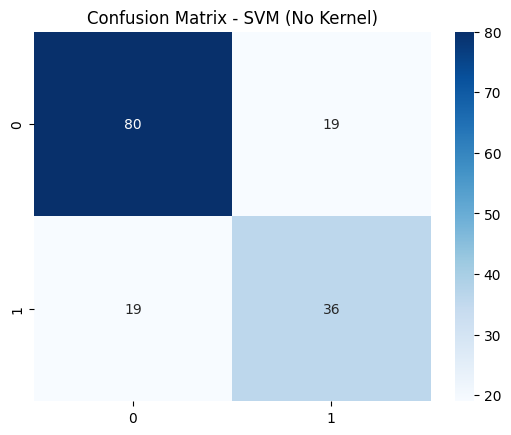

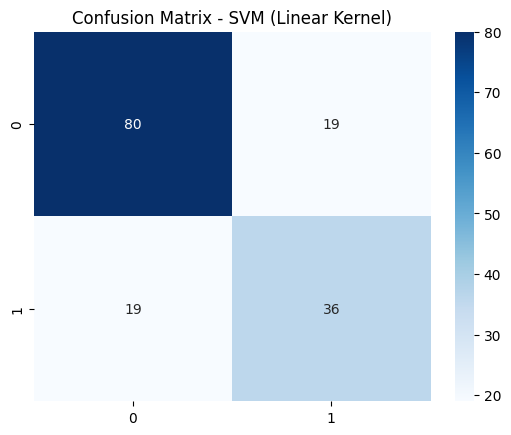

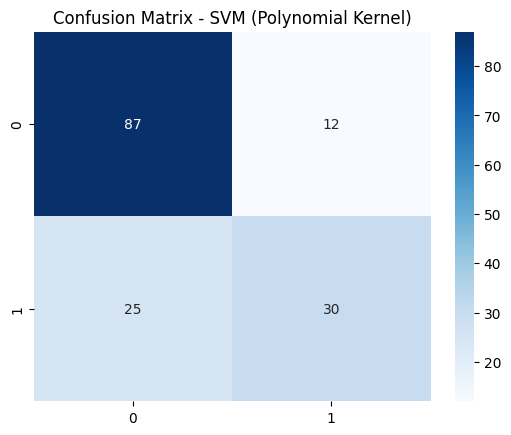

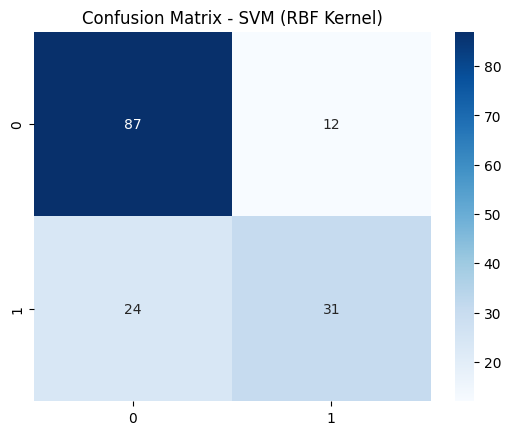

In [65]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# Разделение на обучающий и тестовый наборы данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Метод опорных векторов (SVM) без ядра
svm_no_kernel = SVC(kernel='linear', random_state=42)
svm_no_kernel.fit(X_train, y_train)

# Визуализация матрицы классификации для SVM (No Kernel)
sns.heatmap(metrics.confusion_matrix(y_test, svm_no_kernel.predict(X_test)), annot=True,  fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix - SVM (No Kernel)')
plt.show()

# Метод опорных векторов (SVM) с линейным ядром
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train, y_train)

# Визуализация матрицы классификации для SVM (Linear Kernel)
sns.heatmap(metrics.confusion_matrix(y_test, svm_linear.predict(X_test)), annot=True,  fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix - SVM (Linear Kernel)')
plt.show()

# Метод опорных векторов (SVM) с полиномиальным ядром
svm_poly = SVC(kernel='poly', degree=3, random_state=42)
svm_poly.fit(X_train, y_train)

# Визуализация матрицы классификации для SVM (Polynomial Kernel)
sns.heatmap(metrics.confusion_matrix(y_test, svm_poly.predict(X_test)), annot=True,  fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix - SVM (Polynomial Kernel)')
plt.show()

# Метод опорных векторов (SVM) с гауссовым ядром
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train, y_train)

# Визуализация матрицы классификации для SVM (RBF Kernel)
sns.heatmap(metrics.confusion_matrix(y_test, svm_rbf.predict(X_test)), annot=True,  fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix - SVM (RBF Kernel)')
plt.show()


##### ii. Метод ближайших соседей

KNN Accuracy: 0.6623376623376623


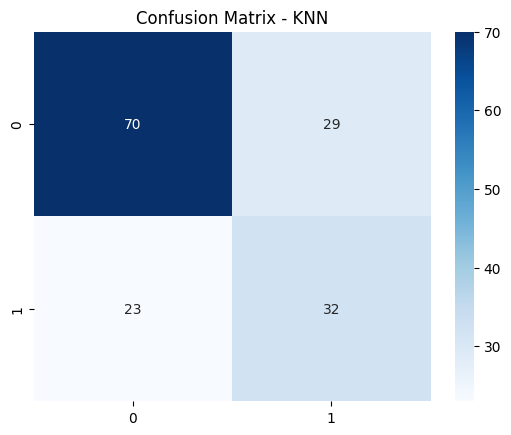

In [64]:
from sklearn.neighbors import KNeighborsClassifier

# Метод ближайших соседей (KNN)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Оценка модели KNN
print("KNN Accuracy:", knn.score(X_test, y_test))

# Визуализация матрицы классификации для KNN
sns.heatmap(metrics.confusion_matrix(y_test, knn.predict(X_test)), annot=True,  fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix - KNN')
plt.show()


##### iii. Многослойный перцептрон


MLP Accuracy: 0.7012987012987013


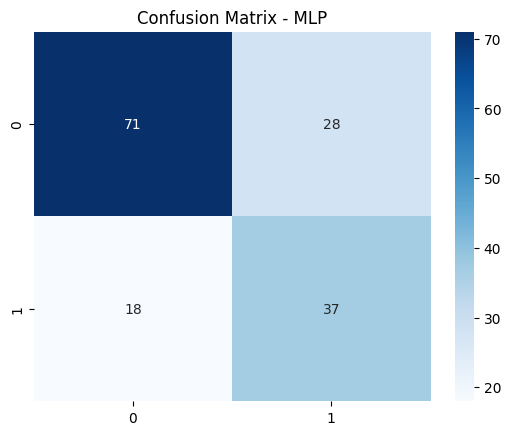

In [63]:
from sklearn.neural_network import MLPClassifier

# Многослойный перцептрон (MLP)
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

# Оценка модели MLP
print("MLP Accuracy:", mlp.score(X_test, y_test))

# Визуализация матрицы классификации для MLP
sns.heatmap(metrics.confusion_matrix(y_test, mlp.predict(X_test)), annot=True,  fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix - MLP')
plt.show()


##### iv. Дерево решений


Decision Tree Accuracy: 0.7467532467532467


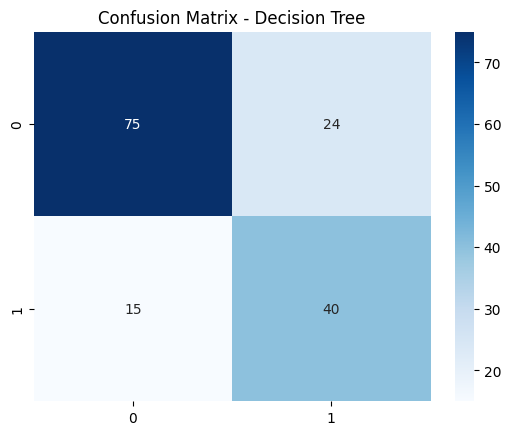

In [62]:
from sklearn.tree import DecisionTreeClassifier

# Дерево решений
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Оценка модели Дерева решений
print("Decision Tree Accuracy:", decision_tree.score(X_test, y_test))

# Визуализация матрицы классификации для Дерева решений
sns.heatmap(metrics.confusion_matrix(y_test, decision_tree.predict(X_test)), annot=True,  fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix - Decision Tree')
plt.show()


##### v. Наивный байесовский классификатор

Naive Bayes Accuracy: 0.7662337662337663


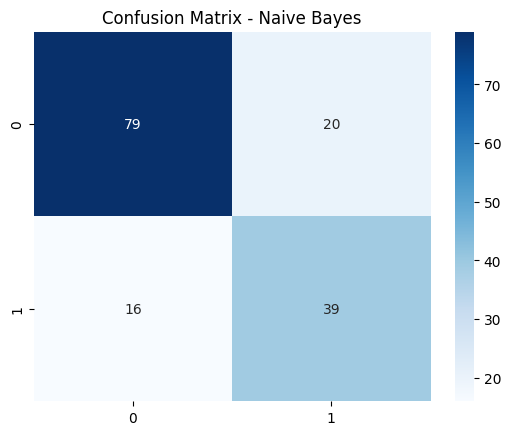

In [61]:
from sklearn.naive_bayes import GaussianNB

# Наивный байесовский классификатор (Gaussian Naive Bayes)
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

# Оценка модели Наивного байесовского классификатора
print("Naive Bayes Accuracy:", naive_bayes.score(X_test, y_test))

# Визуализация матрицы классификации для Наивного байесовского классификатора
sns.heatmap(metrics.confusion_matrix(y_test, naive_bayes.predict(X_test)), annot=True,  fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix - Naive Bayes')
plt.show()


##### vi. (*) Другие методы:

###### a. Пассивно-агрессивный классификатор

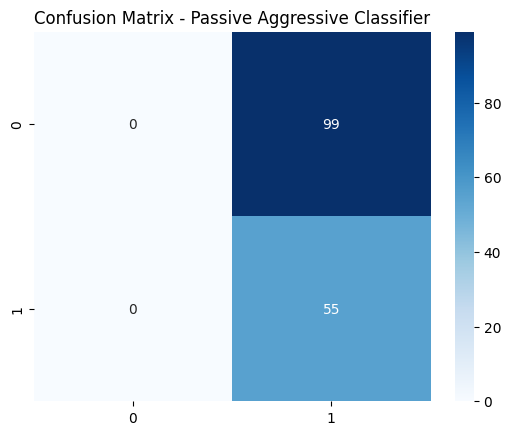

In [60]:
from sklearn.linear_model import PassiveAggressiveClassifier

# Пассивно-агрессивный классификатор
pac_classifier = PassiveAggressiveClassifier(max_iter=1000)
pac_classifier.fit(X_train, y_train)

# Визуализация матрицы классификации для Пассивно-агрессивного классификатора
sns.heatmap(metrics.confusion_matrix(y_test, pac_classifier.predict(X_test)), annot=True,  fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title("Confusion Matrix - Passive Aggressive Classifier")
plt.show()



###### b. Гребневый классификатор

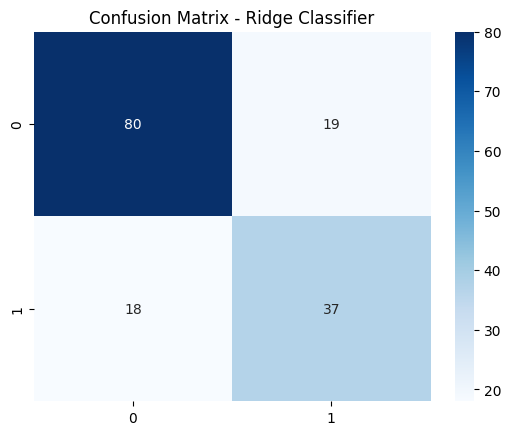

In [59]:
from sklearn.linear_model import RidgeClassifierCV

# Гребневый классификатор с автоматическим подбором параметра регуляризации (alpha)
ridge_classifier = RidgeClassifierCV(alphas=[1e-3, 1e-2, 1e-1, 1])
ridge_classifier.fit(X_train, y_train)

# Визуализация матрицы классификации для Гребневого классификатора
sns.heatmap(metrics.confusion_matrix(y_test, ridge_classifier.predict(X_test)), annot=True,  fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title("Confusion Matrix - Ridge Classifier")
plt.show()


###### c. Случайный лес

Random Forest Accuracy: 0.7207792207792207


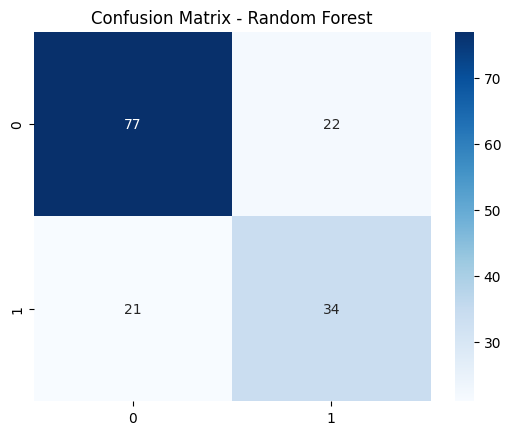

In [58]:
from sklearn.ensemble import RandomForestClassifier

# Модель случайного леса
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

# Оценка модели случайного леса
print("Random Forest Accuracy:", random_forest.score(X_test, y_test))

# Визуализация матрицы классификации для случайного леса
sns.heatmap(metrics.confusion_matrix(y_test, random_forest.predict(X_test)), annot=True,  fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title("Confusion Matrix - Random Forest")
plt.show()


###### d. Беггинг

Bagging Accuracy: 0.7402597402597403


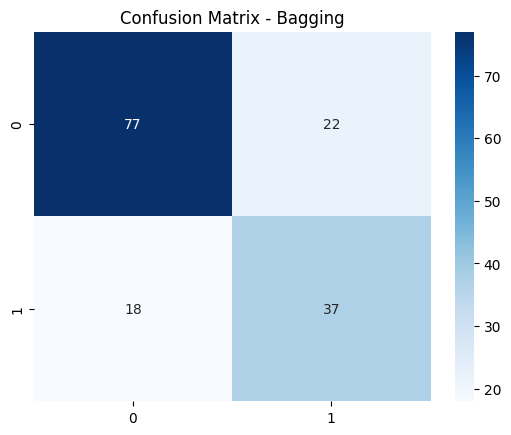

In [50]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Беггинг с деревьями решений
base_classifier = DecisionTreeClassifier(random_state=42)
bagging_classifier = BaggingClassifier(base_classifier, n_estimators=100, random_state=42)
bagging_classifier.fit(X_train, y_train)

# Оценка модели беггинга
print("Bagging Accuracy:", bagging_classifier.score(X_test, y_test))

# Визуализация матрицы классификации для беггинга
sns.heatmap(metrics.confusion_matrix(y_test, bagging_classifier.predict(X_test)), annot=True,  fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title("Confusion Matrix - Bagging")
plt.show()


#### 3.Напишите функцию, которая автоматически обучает все перечисленные модели и для каждой выдает оценку точности.

In [49]:
def train_and_evaluate_models(X_train, y_train, X_test, y_test):
    models = {
        'Logistic Regression': LogisticRegression(),
        'Support Vector Machine (Linear Kernel)': SVC(kernel='linear'),
        'Support Vector Machine (RBF Kernel)': SVC(kernel='rbf'),
        'Support Vector Machine (Polynomial Kernel)': SVC(kernel='poly', degree=3),
        'Support Vector Machine (Sigmoid Kernel)': SVC(kernel='sigmoid'),
        'K-Nearest Neighbors': KNeighborsClassifier(),
        'Multi-layer Perceptron': MLPClassifier(max_iter=1000),
        'Decision Tree': DecisionTreeClassifier(),
        'Naive Bayes': GaussianNB(),
        'Passive-Aggressive Classifier': PassiveAggressiveClassifier(max_iter=1000),
        'Ridge Classifier': RidgeClassifierCV(),
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
        'Bagging': BaggingClassifier(DecisionTreeClassifier(random_state=42), n_estimators=100, random_state=42)
    }

    for model_name, model in models.items():
        model.fit(X_train, y_train)
        accuracy = model.score(X_test, y_test)
        print(f"{model_name} Accuracy: {accuracy:.4f}")


# Обучение и оценка моделей
train_and_evaluate_models(X_train, y_train, X_test, y_test)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.7468
Support Vector Machine (Linear Kernel) Accuracy: 0.7532
Support Vector Machine (RBF Kernel) Accuracy: 0.7662
Support Vector Machine (Polynomial Kernel) Accuracy: 0.7597
Support Vector Machine (Sigmoid Kernel) Accuracy: 0.5519
K-Nearest Neighbors Accuracy: 0.6623
Multi-layer Perceptron Accuracy: 0.6558
Decision Tree Accuracy: 0.7532
Naive Bayes Accuracy: 0.7662
Passive-Aggressive Classifier Accuracy: 0.6429
Ridge Classifier Accuracy: 0.7532
Random Forest Accuracy: 0.7208
Bagging Accuracy: 0.7403


#### 4. Повторите полностью анализ для другой задачи - распознавание вида ириса по параметрам растения (можно использовать метод sklearn.datasets.load_iris()).

In [74]:
from sklearn.datasets import load_iris

# Загрузка данных
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['Species'] = iris.target_names[iris.target]

# Выделение целевой переменной и факторов
y = iris.target
X = iris.data

# Разделение на обучающий и тестовый наборы данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=36)

# Обучение и оценка моделей
train_and_evaluate_models(X_train, y_train, X_test, y_test)


Logistic Regression Accuracy: 0.9667
Support Vector Machine (Linear Kernel) Accuracy: 1.0000
Support Vector Machine (RBF Kernel) Accuracy: 0.9667
Support Vector Machine (Polynomial Kernel) Accuracy: 0.9667
Support Vector Machine (Sigmoid Kernel) Accuracy: 0.2667
K-Nearest Neighbors Accuracy: 1.0000
Multi-layer Perceptron Accuracy: 1.0000
Decision Tree Accuracy: 0.9667
Naive Bayes Accuracy: 0.9333
Passive-Aggressive Classifier Accuracy: 0.6333
Ridge Classifier Accuracy: 0.7333
Random Forest Accuracy: 0.9667
Bagging Accuracy: 0.9667
